In [ ]:
# Apply linear regression on the Boston Housing dataset with "MV" as the dependent variable. Arrive at the final dataset with reduced number of columns, utilizing p-value, correlation coefficient, and multiple R-squared statistics. Use whatever libraries are appropriate when coding in Python. Can you run the same in Excel using a data analysis function and the prepared dataset?

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
import seaborn as sns
# Read the excel file
df = pd.read_excel('boston housing.xls')


In [12]:
#get the top values in the file
df.head()

#get to know the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<AxesSubplot:>

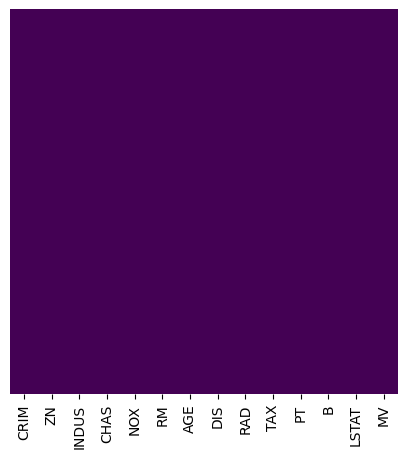

In [15]:
#to check if there are any null values in the dataframe
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [17]:

# Select the dependent variable
y = df['MV']

# Select the independent variables
X = df.drop('MV', axis=1)

# Compute the p-value, correlation coefficient and multiple R-squared statistics
# p-value is used to determine the significance of each feature in the model, correlation coefficient measures the strength of the relationship between each feature and the target variable and R-squared measures the proportion of variability in the target variable that can be explained by the features in the model.
p_values = f_regression(X, y)[1]
print("p-values :-")
print(p_values)
# corr_coef = np.corrcoef(X, y)
corr_coef = df.corr()
print("corr_coef :-")
print(corr_coef)


multiple_r_squared = LinearRegression().fit(X, y).score(X, y)
print("multiple_r_squared :-")
print(multiple_r_squared)



p-values
[1.17398624e-19 5.71358151e-17 4.90024232e-31 7.39062277e-05
 7.06503408e-24 2.48724569e-74 1.56998146e-18 1.20661095e-08
 5.46593142e-19 5.63773068e-29 1.60949928e-34 1.31811197e-14
 5.08108973e-88]
corr_coef
           CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM   1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN    -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS  0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS  -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX    0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM    -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE    0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS   -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD    0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.4

In [35]:
# Select the independent variables with p-value less than 0.05
# By selecting only the features with a p-value less than 0.05, you are essentially removing features that are likely to have little to no effect on the target variable, and focusing on the features that are likely to be important. This can help to improve the performance of the model, and also make it easier to interpret the model.
X_selected = X.iloc[:, p_values < 0.05]


# =====

# Fit a linear regression model and make predictions
reg = LinearRegression().fit(X_selected, y)



# Access the coefficients of the independent variables
# Accessing the correlation coefficient of the independent variables can help to identify which features are most important in predicting the target variable.
coefficients = reg.coef_
correlation = X.corrwith(y)


print("coefficients")
print(coefficients)
print(correlation.sort_values(ascending=False))
#as we see that RM has the higest value, so it is more closely related to MV so we use RM

# Access the constant term (intercept) of the linear regression model
# This term represents the base case of the model, and it's important to access it because it can have an important effect on the predictions. For example, if the intercept is very high, it means that even when all independent variables are equal to zero, the target variable will still be high.
intercept = reg.intercept_
print("intercept")
print(intercept)


coefficients
[-1.08011353e-01  4.64204559e-02  2.05586761e-02  2.68673389e+00
 -1.77666149e+01  3.80986498e+00  6.92223926e-04 -1.47556679e+00
  3.06049515e-01 -1.23345932e-02 -9.52747256e-01  9.31168341e-03
 -5.24758397e-01]
RM       0.695360
ZN       0.360445
B        0.333461
DIS      0.249929
CHAS     0.175260
AGE     -0.376955
RAD     -0.381626
CRIM    -0.388305
NOX     -0.427321
TAX     -0.468536
INDUS   -0.483725
PT      -0.507787
LSTAT   -0.737663
dtype: float64
intercept
36.459491457833394


<Figure size 1000x1000 with 0 Axes>

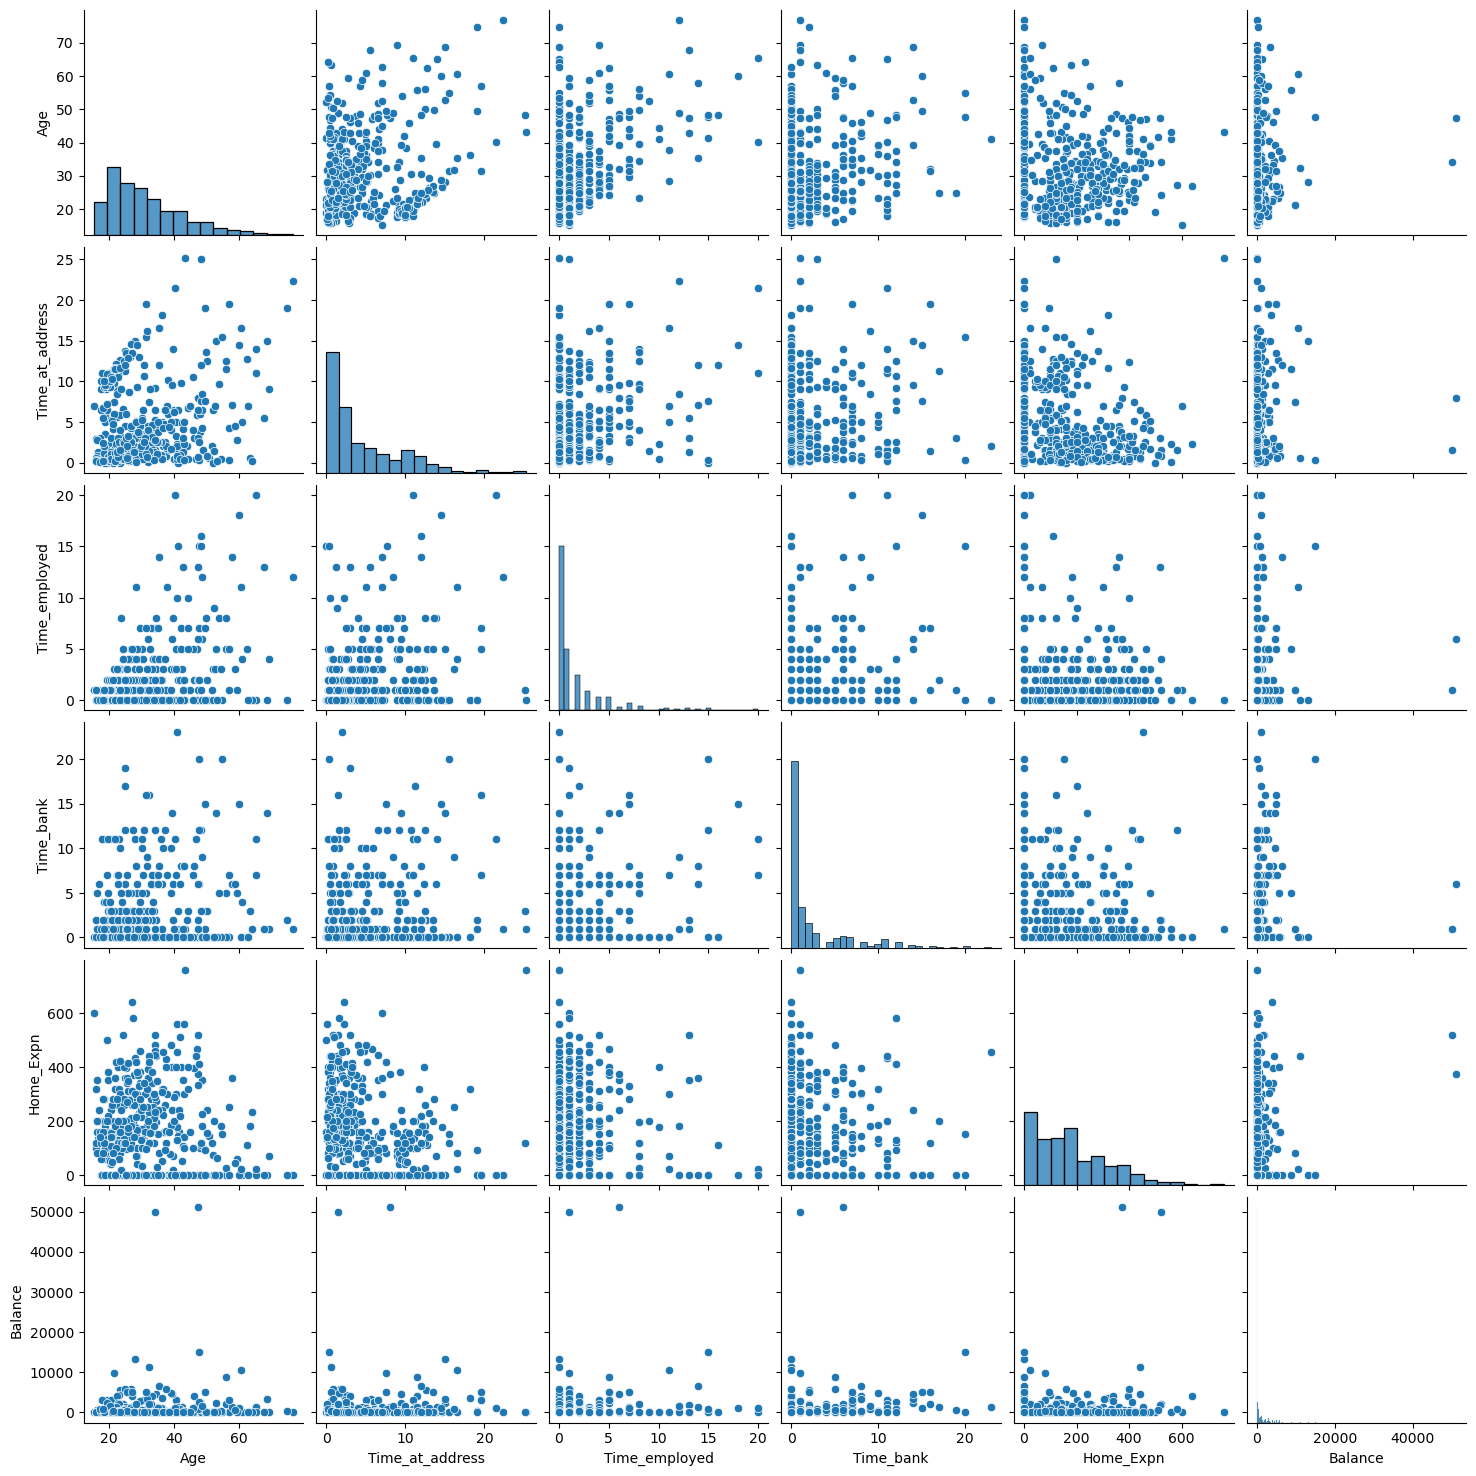

In [136]:
plt.figure(figsize=(10,10))
sns.pairplot(df)

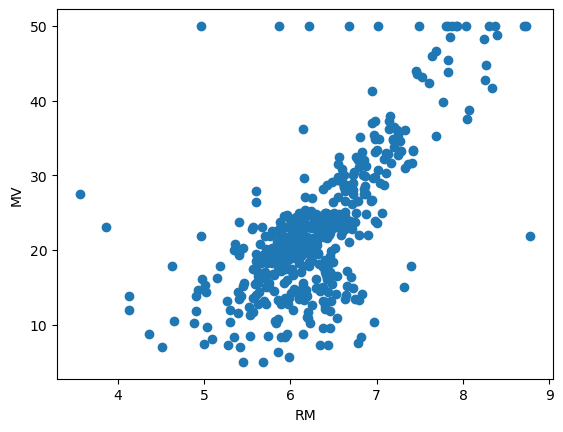

In [21]:
# Scatter plot of one independent variable and target variable
# this plot helpes understand relationship between two variable and define the strong relationship.We can see how strong the relationship of RM and MV is.  
plt.scatter(X["RM"], y)
plt.xlabel("RM")
plt.ylabel("MV")
plt.show()


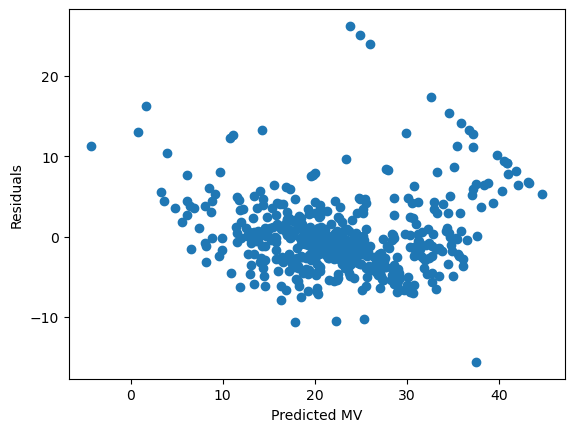

In [23]:
# Residual plot
# The residual plot is used to check the assumptions of linear regression, specifically the assumption of constant variance (homoscedasticity) and linearity.
# A random pattern of residuals on the plot indicates that the model is fitting the data well and the residuals are independent of the independent variable. This means that the variance of the residuals is constant and the model is not overfitting or underfitting the data.
y_pred = lin_reg.predict(X)
# residual = observed y value - predicted y value
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted MV")
plt.ylabel("Residuals")
plt.show()



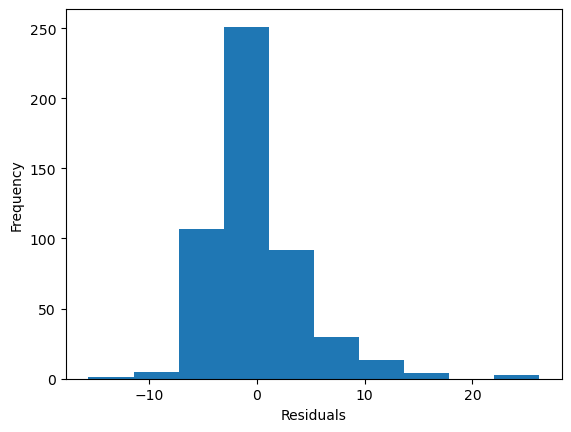

In [24]:
# Distribution plots
plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

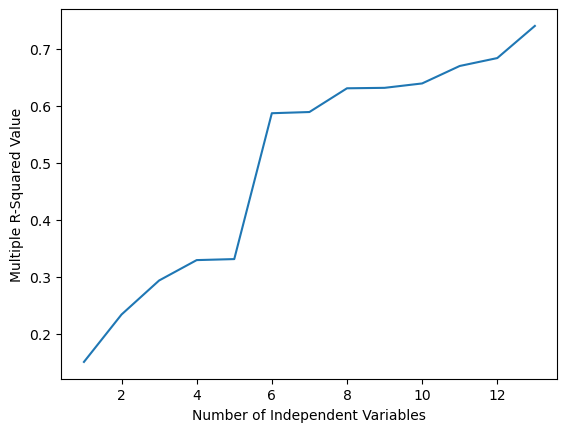

In [30]:
# R-squared value plot
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



# Fit the linear regression model
X = df.drop("MV", axis=1)
y = df["MV"]

r_squared_list = []
for i in range(X.shape[1]):
    selected_features = X.columns[:i+1]
    X_temp = X[selected_features]
    multiple_r_squared = LinearRegression().fit(X_temp, y).score(X_temp, y)
    r_squared_list.append(multiple_r_squared)

plt.plot(range(1,X.shape[1]+1), r_squared_list)
plt.xlabel("Number of Independent Variables")
plt.ylabel("Multiple R-Squared Value")
plt.show()


,Actual Value,Predicted Value,Difference
0,24.000000,30.003842,-6.003842
1,21.600000,25.025563,-3.425562
2,34.700001,30.567597,4.132404
3,33.400002,28.607036,4.792965
4,36.200001,27.943523,8.256478


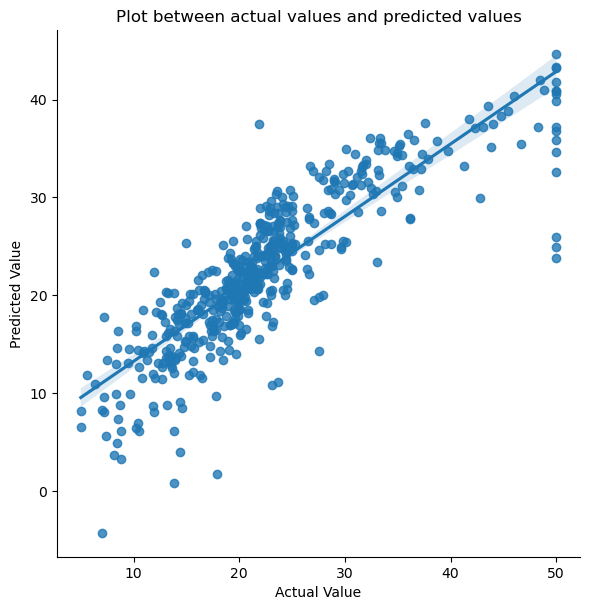

In [37]:
y_pred_df = pd.DataFrame({'Actual Value': y, 'Predicted Value': y_pred, 'Difference': y - y_pred})

sns.lmplot(x='Actual Value', y='Predicted Value', data=y_pred_df, height=6, aspect=1)
ax = plt.gca()
ax.set_title('Plot between actual values and predicted values')

y_pred_df.head()

In [39]:
X = df[['RM', 'ZN', 'B', 'DIS', 'AGE', 'LSTAT']]
y = df['MV']
model = sm.OLS(y,X)
results = model.fit()
# results.params
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     MV   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              1725.
Date:                Wed, 25 Jan 2023   Prob (F-statistic):                        0.00
Time:                        12:08:44   Log-Likelihood:                         -1554.5
No. Observations:                 506   AIC:                                      3121.
Df Residuals:                     500   BIC:                                      3146.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [41]:
# We can do linear regression in excel using Data Analysis Toolpak
# Here are the steps to perform linear regression analysis in Excel:

# Open your dataset in Excel and select the data range that you want to analyze.

# Go to the "Data" tab and click on the "Data Analysis" button.

# In the Data Analysis dialog box, select "Regression" and click "OK".

# In the Regression dialog box, select the dependent variable (MV) and the independent variable (RM) and any other variable you want to include in the analysis.

# Select the output range where you want the results to be displayed, and click "OK".

# The results will be displayed in a new sheet, including the regression coefficients, p-values, R-squared value and other statistics.

# You can then use the regression coefficients to create a line of best fit and make predictions using the formula:
# Predicted_value = Coefficient of Independent variable * independent variable + Constant

# You can also use the p-value and R-squared value to evaluate the goodness-of-fit of the model and check the assumptions of linear regression.



In [42]:
# Logistic Regression:
# Apply logistic regression on the Loan dataset with "Decision" as the dependent variable. Do the necessary one-hot encoding for the categorical variables and discard the irrelevant variables. Use whatever libraries are appropriate when coding in Python.

<AxesSubplot:>

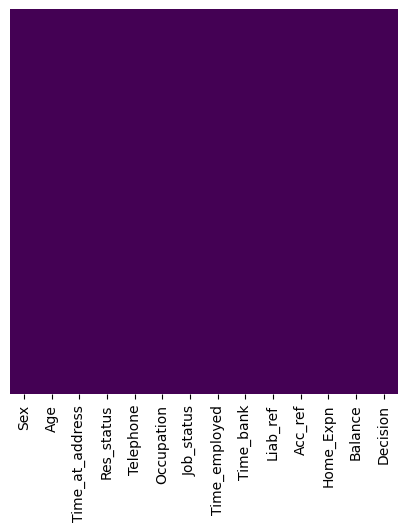

In [130]:
loan_df = pd.read_excel('loan.xlsx')

#to check if there are any null values in the dataframe
plt.figure(figsize=(5,5))
sns.heatmap(loan_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<Figure size 1000x1000 with 0 Axes>

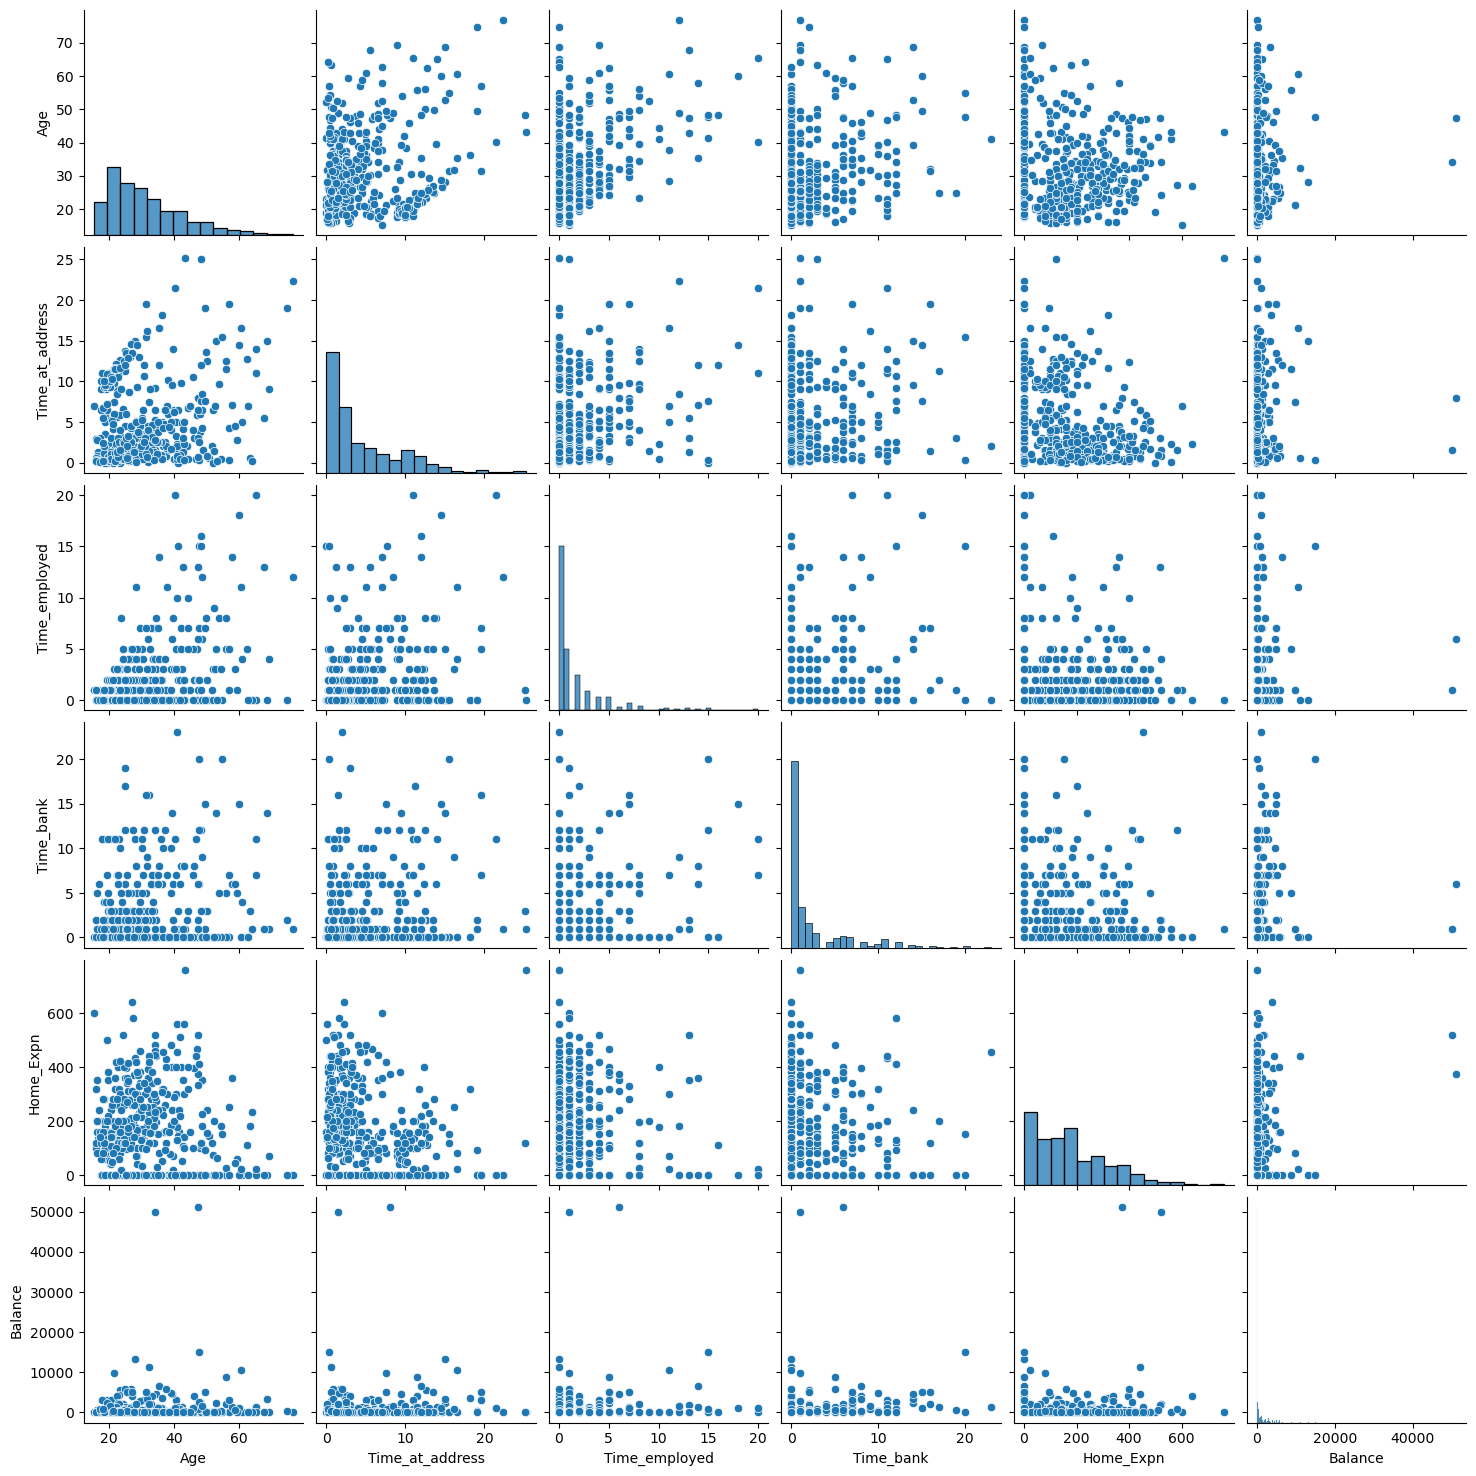

In [137]:
# scatterplt
plt.figure(figsize=(10,10))
sns.pairplot(loan_df)

<AxesSubplot:>

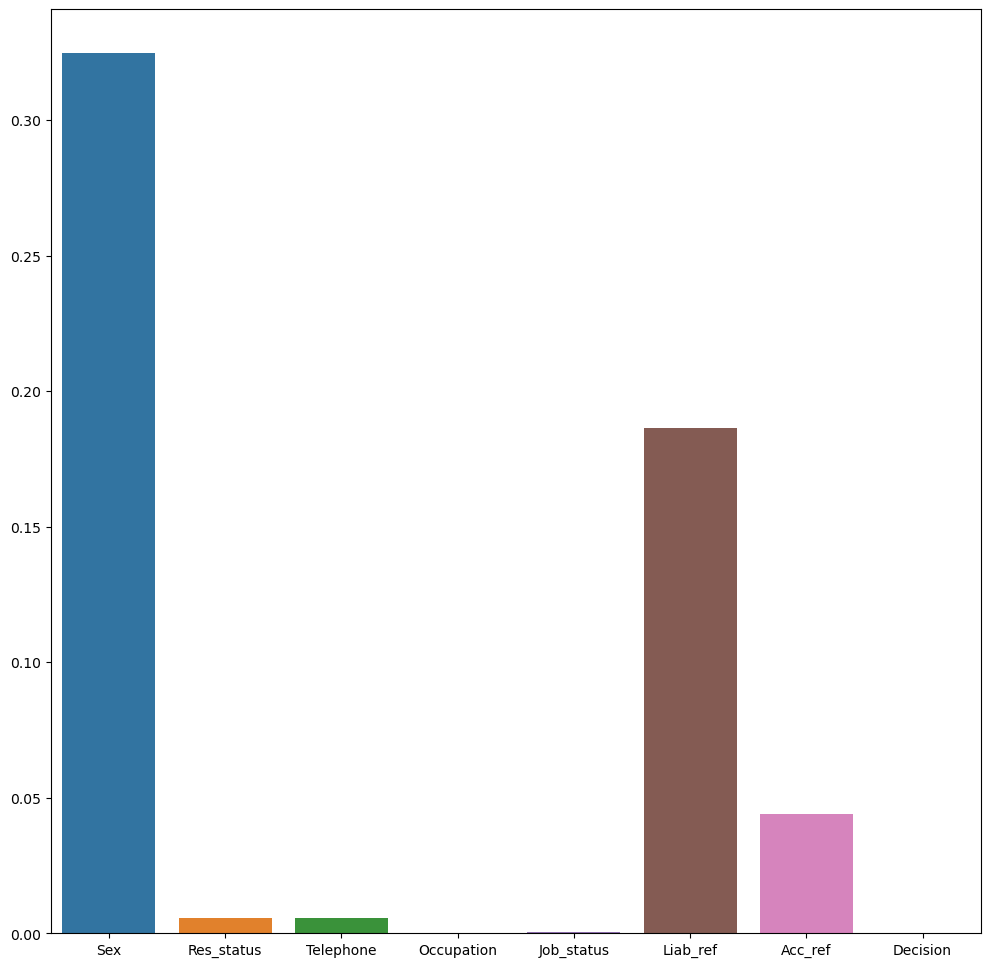

In [103]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns

# Load the dataset
df = pd.read_excel("loan.xlsx")

# Create a dictionary to store the p-values for each categorical column
p_values_dict = {}

# Perform chi-square test for each categorical column
for column in df.select_dtypes(include='object').columns:
    crosstab = pd.crosstab(df[column], df["Decision"])
    p_value = chi2_contingency(crosstab)[1]
    p_values_dict[column] = p_value

# Plot the results in a bar chart
sns.barplot(x=list(p_values_dict.keys()), y=list(p_values_dict.values()))


In [113]:
#Now I'm performing Feature Engineering to turn categorical columns to proper continuous values to be able to use them in model
# using one-hot encoding
#Sex
loan_df = pd.read_excel('loan.xlsx')
Sex = pd.get_dummies(loan_df['Sex'], drop_first=True, prefix='sex')
#Res_status
Res_status = pd.get_dummies(loan_df['Res_status'], drop_first=True, prefix='res_status')
#Telephone
Telephone = pd.get_dummies(loan_df['Telephone'], drop_first=True, prefix='telephone')
# Occupation
Occupation = pd.get_dummies(loan_df['Occupation'], drop_first=True, prefix='occupation')
#Job_status
Job_status = pd.get_dummies(loan_df['Job_status'], drop_first=True, prefix='job_status')
# Liab_ref
Liab_ref = pd.get_dummies(loan_df['Liab_ref'], drop_first=True, prefix='liab_ref')
# Acc_ref
Acc_ref = pd.get_dummies(loan_df['Acc_ref'], drop_first=True, prefix='acc_ref')
# Decision
Decision =  pd.get_dummies(loan_df['Decision'], drop_first=True, prefix='decision')

loan_df.drop(['Sex', 'Res_status', 'Telephone', 'Occupation', 'Job_status', 'Liab_ref', 'Acc_ref', 'Decision'],
                axis=1, inplace=True)

loan_df = pd.concat([loan_df, Sex, Res_status, Telephone, Occupation, Job_status, Liab_ref, Acc_ref, Decision],
                       axis=1)

In [114]:
print(loan_df.columns)

Index(['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Home_Expn',
       'Balance', 'sex_M', 'res_status_rent', 'telephone_not_given',
       'occupation_driver', 'occupation_executive', 'occupation_guard_etc',
       'occupation_labourer', 'occupation_manager', 'occupation_office_st',
       'occupation_productio', 'occupation_professio', 'occupation_sales',
       'occupation_semi_pro', 'occupation_unemploye', 'job_status_military',
       'job_status_private_s', 'job_status_retired', 'job_status_self_empl',
       'job_status_student', 'job_status_unemploye', 'liab_ref_t',
       'acc_ref_oth_inst_', 'decision_reject'],
      dtype='object')


In [115]:
#Preparing data for training and testing
# asg_loan_df_copy = asg_loan_df.copy(deep=True)
# take 1 running the model with all the features just to check whats the result

y = loan_df['decision_reject']
X = loan_df.drop(['decision_reject'], axis=1)

X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)

(300, 28)


In [117]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

regr_model = LogisticRegression(max_iter=10000)
regr_model.fit(X_train, y_train)

predicted_values = regr_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.54      0.67        57
           1       0.72      0.94      0.82        72

    accuracy                           0.77       129
   macro avg       0.80      0.74      0.75       129
weighted avg       0.80      0.77      0.76       129

Accuracy: 0.7674418604651163


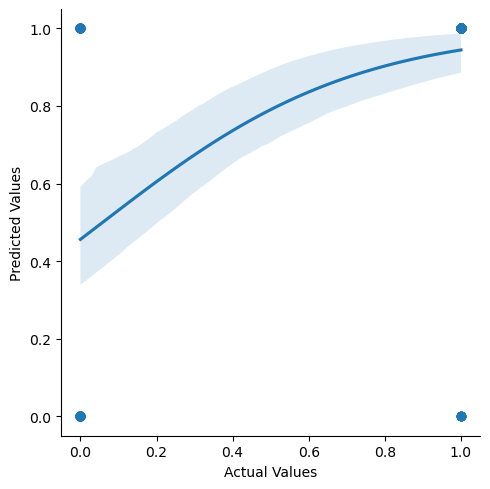

In [122]:
pred_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': predicted_values})

sns.lmplot(data=pred_df, x='Actual Values', y='Predicted Values', logistic=True)

plt.scatter(x=y_test, y=predicted_values)

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_values))

print('Accuracy:', accuracy_score(y_test, predicted_values))

Text(0.5, 1061.5555555555557, 'Predicted label')

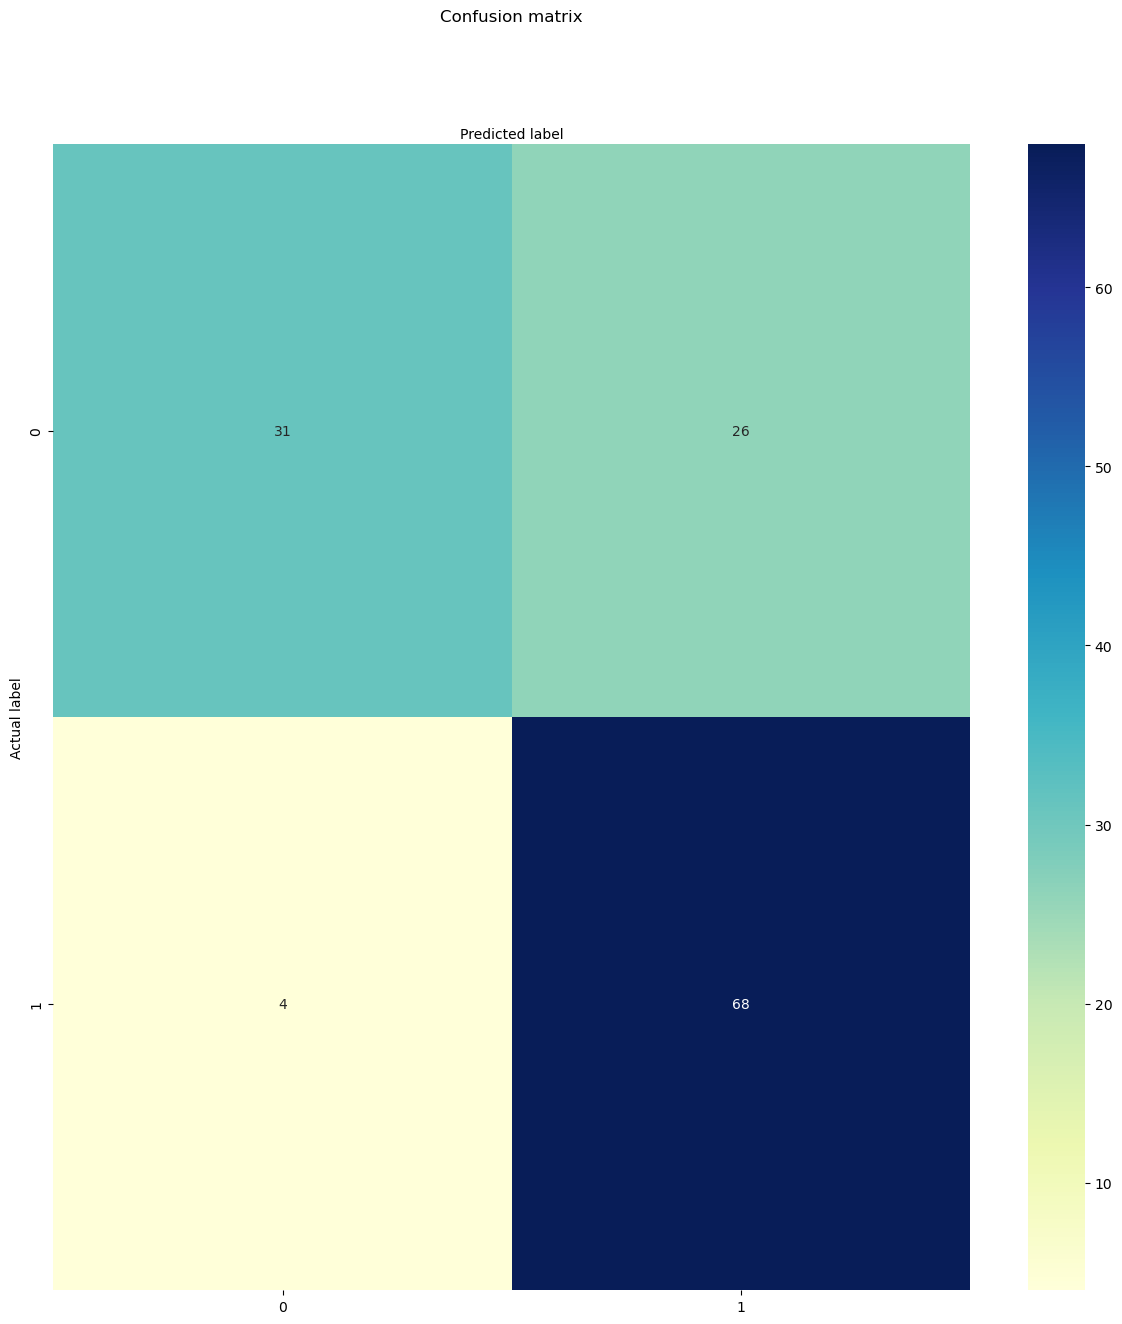

In [134]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predicted_values)
cnf_matrix
# visulaise confusion matrix using heatmapp
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

In [123]:
# flatten will return the coefficient values collapsed into 1-D array and we can plot that on a bar plot to check the
# significance
loan_col_importance = regr_model.coef_.flatten()

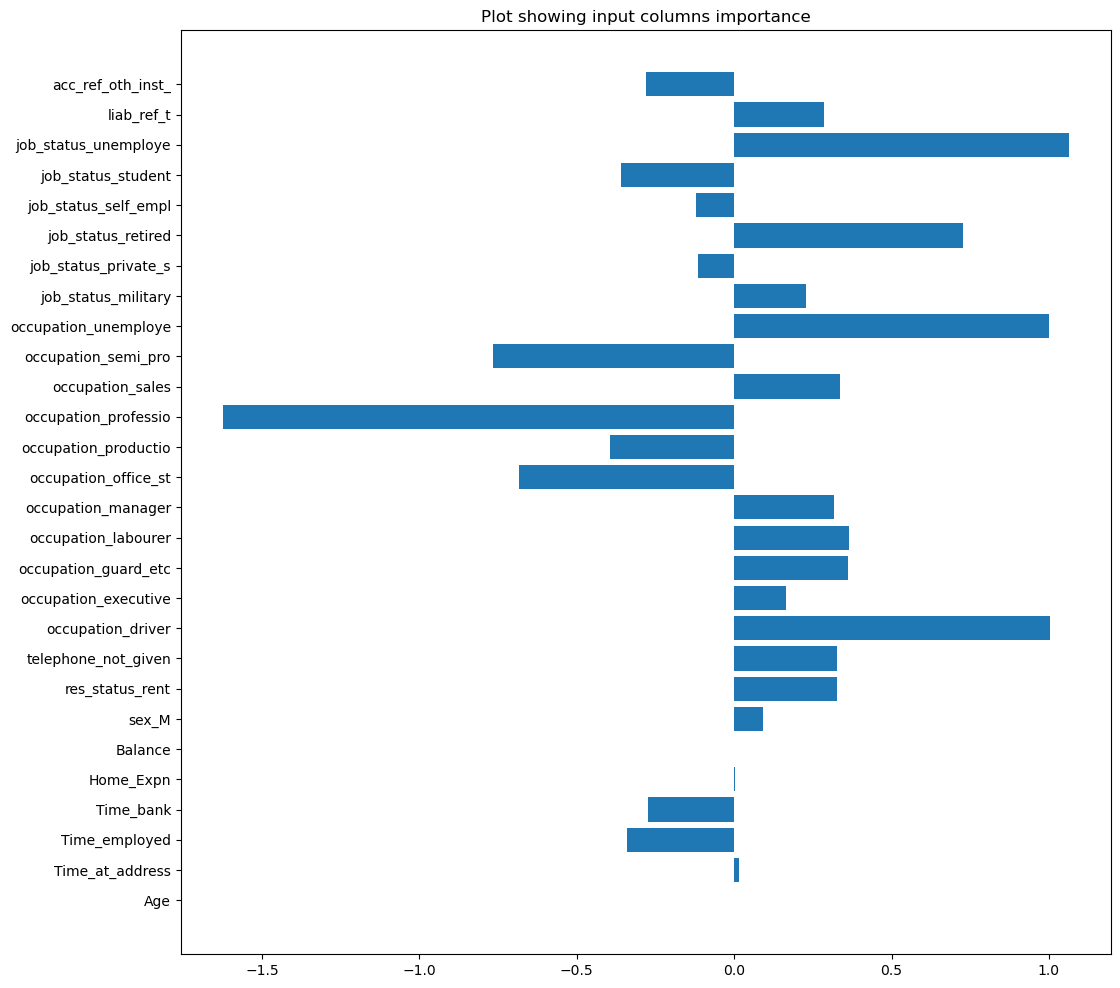

In [93]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.barh(X.columns, asg_loan_col_importance)
plt.title('Plot showing input columns importance')
plt.show()

In [124]:
regr_model.coef_
regr_model.intercept_

array([1.04888295])

In [95]:
#take 2 to shrink down the number of features 
# from the Chi square test we done above for categorical columns and found Occupation and Job_status to be having very less
# so removing other categorical columns and selecting now Occupation and Job_status
# X.columns

# Dropping Sex, Res_status, Telephone, Liab_ref, Acc_ref and keeping Occupation and Job_status as they have less p-values
# Dropping Balance, Home_Expn and Age as from the above barplot we can see they don't contribute much to model.

X = X.drop(['sex_M', 'res_status_rent', 'telephone_not_given', 'liab_ref_t', 
            'Balance', 'Home_Expn', 'Age', 'acc_ref_oth_inst_'], axis=1)
X.head()

,Time_at_address,Time_employed,Time_bank,occupation_driver,occupation_executive,occupation_guard_etc,occupation_labourer,occupation_manager,occupation_office_st,occupation_productio,occupation_professio,occupation_sales,occupation_semi_pro,occupation_unemploye,job_status_military,job_status_private_s,job_status_retired,job_status_self_empl,job_status_student,job_status_unemploye
0,0.585,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,10.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15.000,5,14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2.540,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [125]:
#Preparing data for training and testing
# asg_loan_df_copy = asg_loan_df.copy(deep=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [126]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

regr_model = LogisticRegression(max_iter=20000)
regr_model.fit(X_train, y_train)

predicted_values = regr_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.54      0.67        57
           1       0.72      0.94      0.82        72

    accuracy                           0.77       129
   macro avg       0.80      0.74      0.75       129
weighted avg       0.80      0.77      0.76       129

Accuracy: 0.7674418604651163


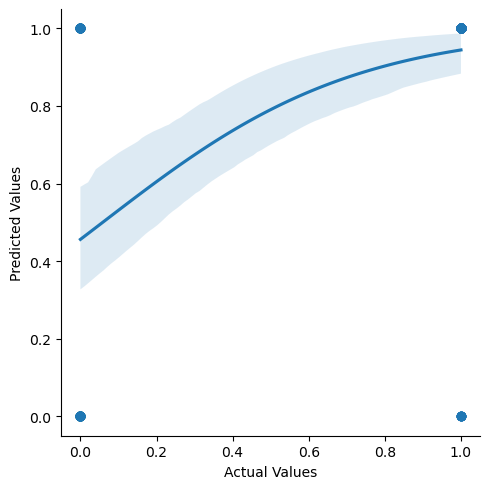

In [127]:
from sklearn.metrics import classification_report, accuracy_score
pred_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': predicted_values})

sns.lmplot(data=pred_df, x='Actual Values', y='Predicted Values', logistic=True)

plt.scatter(x=y_test, y=predicted_values)



print(classification_report(y_test, predicted_values))
print('Accuracy:', accuracy_score(y_test, predicted_values))

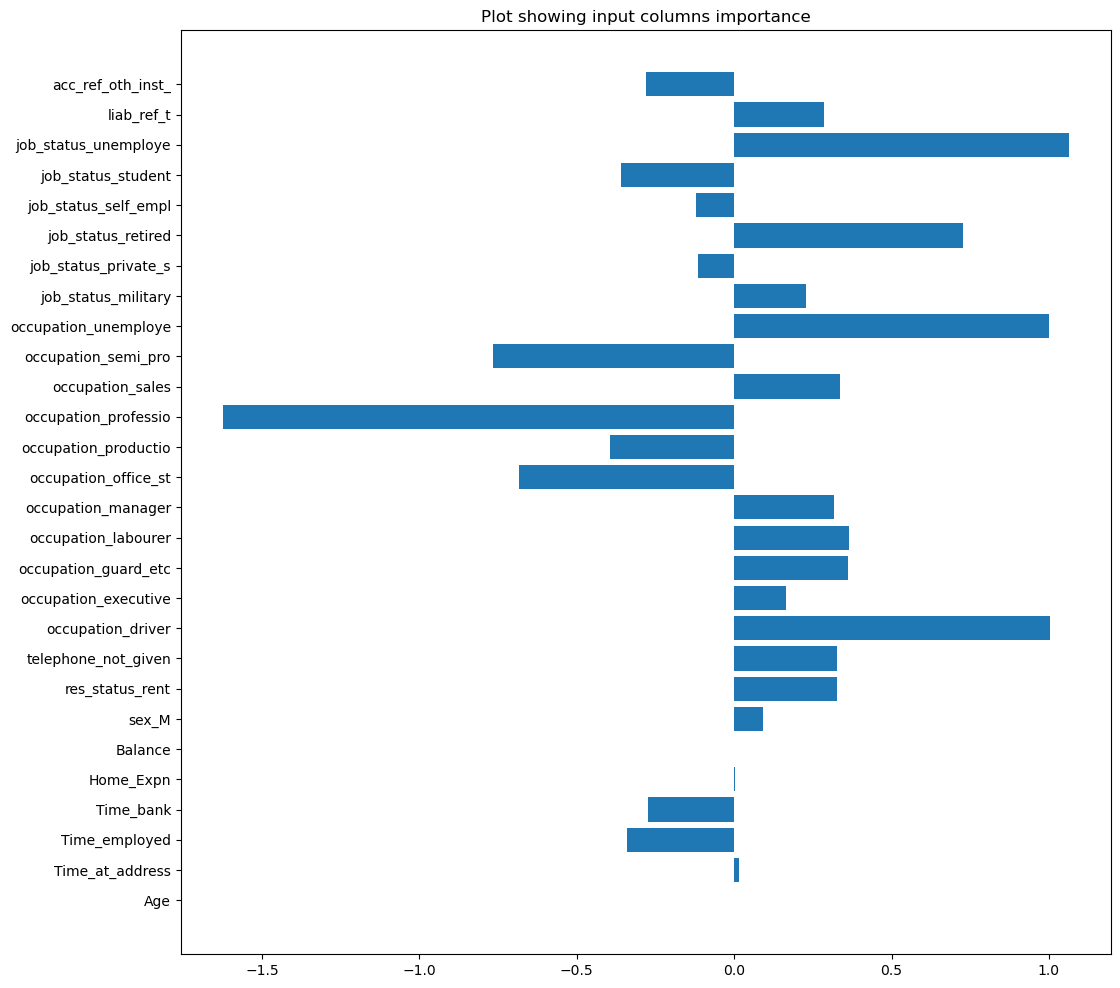

In [128]:
loan_col_importance = regr_model.coef_.flatten()

plt.rcParams['figure.figsize'] = (12, 12)
plt.barh(X.columns, loan_col_importance)
plt.title('Plot showing input columns importance')
plt.show()

In [129]:
# The intercept (sometimes called the “constant”) in a regression model represents the mean value of the response variable when all of the predictor variables in the model are equal to zero.
regr_model.intercept_

array([1.04888295])

In [101]:
# I have arrived at 76.7% accuracy and finally I have selected the columns Time_at_address, Time_employed, Time_bank,	Occupation and Job_status 

In [ ]:
# Logistic Regression is a supervised machine learning algorithm that is used to predict the probability of a categorical dependent variable based on one or more independent variables. In this case, we are applying logistic regression on the Loan dataset where the dependent variable is "Decision" (whether the loan application was approved or not). To use this algorithm, we first need to perform one-hot encoding on the categorical variables. One-hot encoding is a process of converting categorical variables into a numerical form that can be understood by the algorithm. In this case, we are encoding the variables such as "Gender", "Married", "Education", "Self_Employed", and "Property_Area" into numerical form. After encoding the categorical variables, we discard the irrelevant variables so that the model can focus on the important features only. Finally, we use the appropriate libraries in Python, such as the LogisticRegression class from the sklearn.linear_model library, to fit the model and make predictions on the test set. We can also evaluate the model's performance by checking the accuracy score.